# In Class Assignment 2 - ME 364 (Spring 2022)

<font color=red>__Question (1)__</font>: Develop a simple linear regression model using independant variable, "elongation", and the target variable, "tensile strength". Follow the steps in the notebook we used in class to develop your model, report the coefficients, and make predictions on test data.

In [1]:
#Import required functions
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

#Import and Store Dataset
url = 'https://raw.githubusercontent.com/MasoudMiM/ME_364/main/3D_Printer_Data/3DPrinterDataset.csv'  
df = pd.read_csv(url)
df.head()

#Defining independent and dependent variables
x_data = np.array(df[['elongation']]) 
y_data = np.array(df[['tension_strenght']]) 

#Split the data into test and train
x_train,x_test,y_train,y_test=train_test_split(
    x_data,y_data, test_size=0.2, shuffle=True, random_state=100)

#Define linear regression, fit the model to training data, and report weight values
lm1 = LinearRegression()
lm1.fit(x_train, y_train)
LinearRegression()

w0=lm1.intercept_[0]  # w_0
w1=lm1.coef_[0][0]    # W-1
print('The weight valyes are:')
print(f'w_0={w0:.3f} and w_1={w1:.3f}')
print('\n')

#Make a prediction
pred = lm1.predict(x_test)
print('Comparison of Actual and Predicted Values')
print(np.column_stack([y_test, pred]))


The weight valyes are:
w_0=3.340 and w_1=9.778


Comparison of Actual and Predicted Values
[[12.         16.05117625]
 [24.         20.93997005]
 [26.         23.87324632]
 [34.         31.6953164 ]
 [28.         18.98445253]
 [27.         33.65083392]
 [24.         14.09565873]
 [ 9.          9.20686493]
 [16.         15.07341749]
 [28.         24.85100508]]


<font color=red>__Question (2)__</font>: Using the model you developed for Question (1), perform a model evaluation using MSE, MAE, and R$^2$. Also, plot your training data, test data, and the fitted line on the same plot with legends and axes labels. 

The mean squared error is: 27.00
The value of R2 is: 0.52
The value of mean absolute error is: 4.14


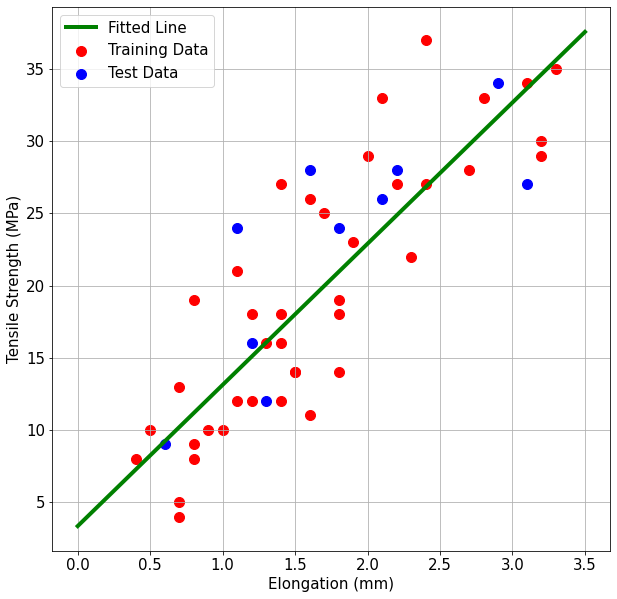

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

#MSE
MSE = mean_squared_error(y_test, pred)
print(f'The mean squared error is: {MSE:.2f}')

#R2 Score
r2score = r2_score(y_test, pred)
print(f'The value of R2 is: {r2score:.2f}')

#Mean Absolute Error
MAE = mean_absolute_error(y_test, pred)
print(f'The value of mean absolute error is: {MAE:.2f}')

#Plot of training data, test data, and fitted line
plt.figure(figsize=(10,10))                       
plt.rc('font',size=15)                            

# Plotting the training data
plt.scatter(x_train, y_train,s=100,color='red',label='Training Data')

# Plotting the test data
plt.scatter(x_test, y_test,s=100,color='blue', label='Test Data')

# Plotting the fitted line
xplot=np.linspace(0,3.5,num=100)
yplot=w0+w1*xplot
plt.plot(xplot, yplot, lw=4,color='green', label='Fitted Line')

# Labling and putting legend
plt.xlabel('Elongation (mm)')
plt.ylabel('Tensile Strength (MPa)')
plt.grid(True)
plt.legend(loc='best');

<font color='red'>__Question (3)__</font>: Follow the steps described in the notebook and develop a linear model using independent variables "elongation" and "roughness", and dependent variable "tensile strength". Find and report the coefficients (weights) and also make predictions using the test data.

In [3]:
#Define the independent and dependent variables
x_data2 = np.array(df[['elongation', 'roughness']]) 
y_data2 = np.array(df[['tension_strenght']]) 

#Split the data into test and train
x_train2,x_test2,y_train2,y_test2=train_test_split(
    x_data2,y_data2, test_size=0.2, shuffle=True, random_state=100)

#Define linear regression, fit the model to training data, and report weight values
lm2 = LinearRegression()
lm2.fit(x_train2, y_train2)
LinearRegression()

w02=lm2.intercept_[0]  # w_0
w12=lm2.coef_[0,0]    # W-1
w22=lm2.coef_[0,1]
print('The weight valyes are:')
print(f'w_0={w02:.3f}, w_1={w12:.3f} and w2 = {w22:.2f}')
print('\n')

#Make a prediction
pred2 = lm2.predict(x_test2)
print('Comparison of Actual and Predicted Values')
print(np.column_stack([y_test2, pred2]))

The weight valyes are:
w_0=4.348, w_1=9.856 and w2 = -0.01


Comparison of Actual and Predicted Values
[[12.         16.78301952]
 [24.         20.63036267]
 [26.         23.89016101]
 [34.         31.98173898]
 [28.         17.64024214]
 [27.         33.38850015]
 [24.         14.77733545]
 [ 9.          8.27270225]
 [16.         15.34991679]
 [28.         23.98085037]]


<font color=red>__Question (4)__</font>: Using the model you developed for Question (3), perform a model evaluation using MSE, MAE, and R$^2$ and print the metrics. Which model has the better performance? Simple linear regression you developed in Q(1)-Q(2) or multiple linear regression?

The mean squared error is: 29.31
The value of R2 is: 0.52
The value of mean absolute error is: 4.36


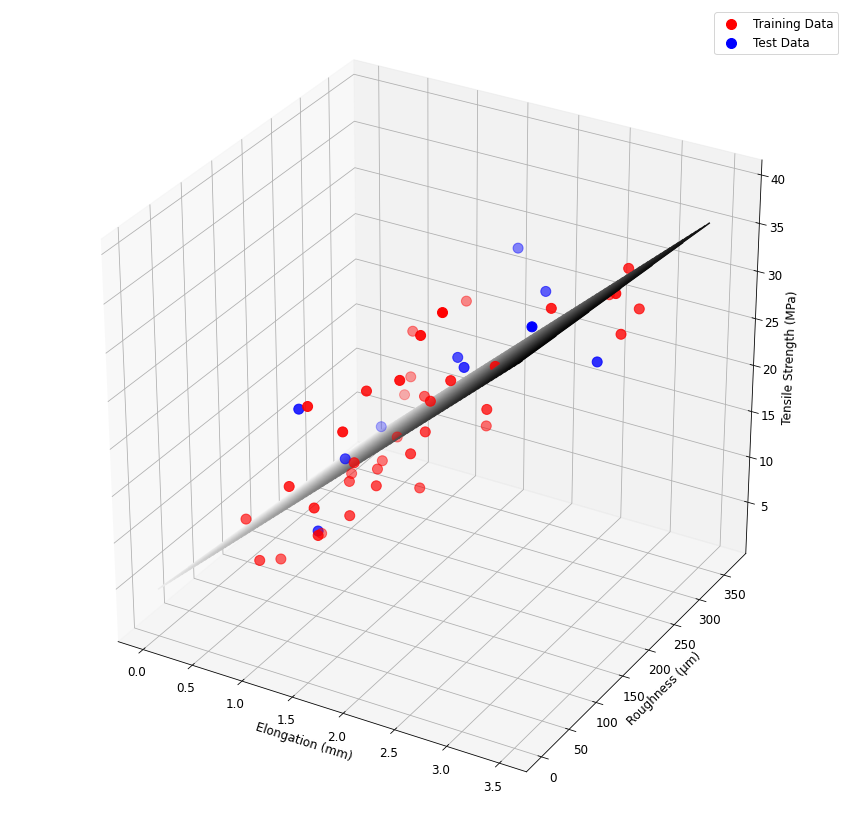

In [5]:
from mpl_toolkits.mplot3d import Axes3D

#MSE
MSE2 = mean_squared_error(y_test2, pred2)
print(f'The mean squared error is: {MSE2:.2f}')

#R2 Score
r2score2 = r2_score(y_test2, pred2)
print(f'The value of R2 is: {r2score:.2f}')

#Mean Absolute Error
MAE2 = mean_absolute_error(y_test2, pred2)
print(f'The value of mean absolute error is: {MAE2:.2f}')


fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
plt.rc('font',size=12)

xt =x_train2[:,0]
yt =x_train2[:,1]
zt =y_train2[:,0]

ax.scatter(xt, yt, zt, c='r', marker='o',s=100, label='Training Data')

xs =x_test2[:,0]
ys =x_test2[:,1]
zs =y_test2[:,0]

ax.scatter(xs, ys, zs, c='b', marker='o',s=100, label='Test Data')

xsrf = np.linspace(0, 3.5, 50)
ysrf = np.linspace(0,350, 50)
X, Y = np.meshgrid(xsrf, ysrf)
Z = w02+w12*X+w22*Y
ax.contour3D(X, Y, Z, 100, cmap='binary')

ax.set_xlabel('Elongation (mm)')
ax.set_ylabel('Roughness (µm)')
ax.set_zlabel('Tensile Strength (MPa)')

plt.legend()
plt.show()